# Reading the data into Python

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

Diamond_data=pd.read_csv("C:/Users/nandi/OneDrive/Documents/IVY/Python/IVY Python ML Mar-2023/Python Datasets/Regression Datasets/DiamondPricesData.csv", encoding="latin")

# Printing the shape of data before and after removing duplicates
print("The shape of data before removing duplicates: ", Diamond_data.shape)

Diamond_data.drop_duplicates()

print("The shape of data after removing duplicates: ", Diamond_data.shape)
Diamond_data.head()

The shape of data before removing duplicates:  (53940, 10)
The shape of data after removing duplicates:  (53940, 10)


,price,carat,cut,color,clarity,depth,table,x,y,z
0,326,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,326,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
2,327,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
3,334,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
4,335,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75


# Problem Statement and Target Variable

**Problem statement: predict the appropriate value of a diamond based on its characteristics**

The target variable is **price** !!!

# Looking at the distribution of the target variable

<Axes: >

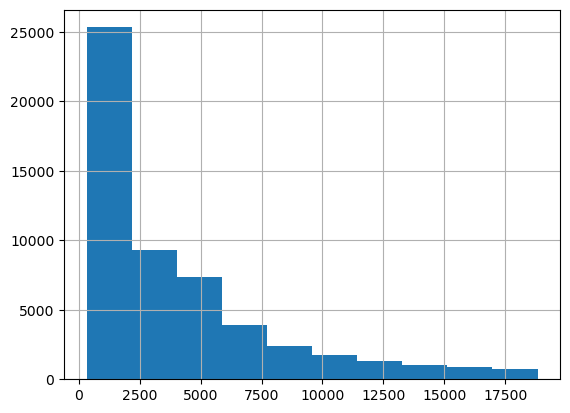

In [2]:
Diamond_data["price"].hist()

# Basic Data Exploration 

In [3]:
Diamond_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   price    53940 non-null  int64  
 1   carat    53940 non-null  float64
 2   cut      53940 non-null  object 
 3   color    53934 non-null  object 
 4   clarity  53940 non-null  object 
 5   depth    53926 non-null  float64
 6   table    53940 non-null  float64
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [4]:
Diamond_data.describe()

,price,carat,depth,table,x,y,z
count,53940.000000,53940.000000,53926.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,3932.799722,0.797940,61.749479,57.457184,5.731157,5.734526,3.538734
std,3989.439738,0.474011,1.432661,2.234491,1.121761,1.142135,0.705699
min,326.000000,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000
25%,950.000000,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000
50%,2401.000000,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000
75%,5324.250000,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000
max,18823.000000,5.010000,79.000000,95.000000,10.740000,58.900000,31.800000


In [5]:
Diamond_data.nunique()

price      11602
carat        273
cut            5
color          7
clarity        8
depth        184
table        127
x            554
y            552
z            375
dtype: int64

## Interpretation of EDA

* price- Continuous **(Target Variable)**
* carat- Continuous
* cut- Categorical            
* color- Categorical          
* clarity- Categorical
* depth- Continuous
* table- Continuous    
* x- Continuous        
* y- Continuous        
* z- Continuous        

# Visual Exploration of Data

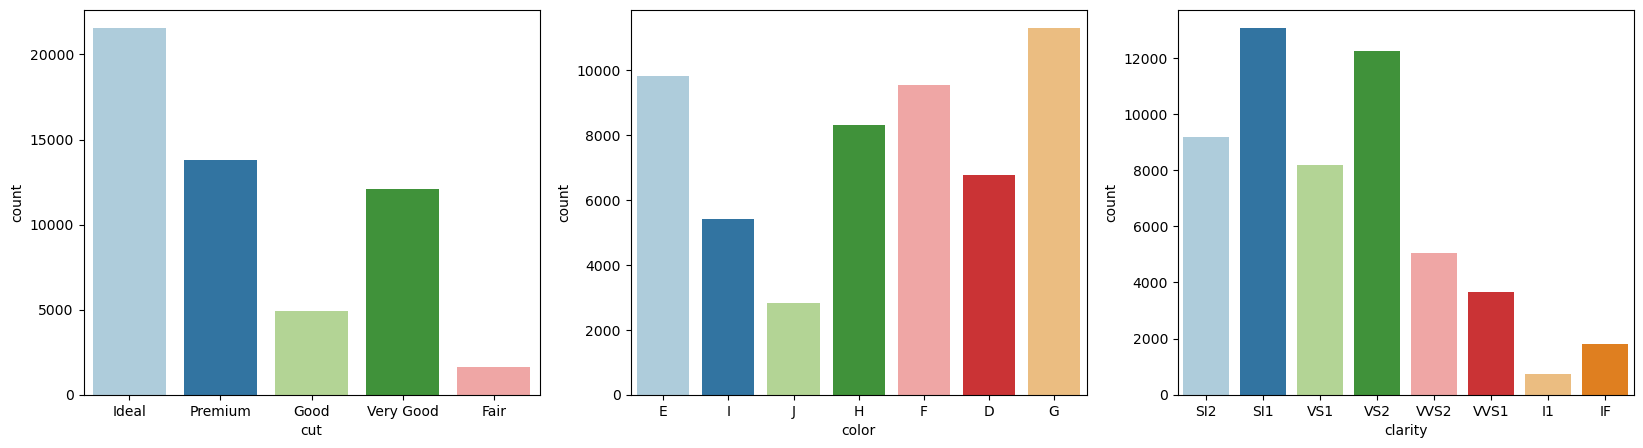

In [6]:
#Exploring Categorical Variables using Barchart
catcol=["cut","color","clarity"]
import matplotlib.pyplot as plt
import seaborn as sb

fig, subplots=plt.subplots(nrows=1,ncols=len(catcol), figsize=(20,5))
for i, col in enumerate(catcol):
    sb.countplot(data=Diamond_data,x=col,ax=subplots[i],palette="Paired" )
plt.show()


array([[<Axes: title={'center': 'carat'}>, <Axes: title={'center': 'z'}>],
       [<Axes: title={'center': 'x'}>, <Axes: title={'center': 'y'}>],
       [<Axes: title={'center': 'table'}>,
        <Axes: title={'center': 'depth'}>]], dtype=object)

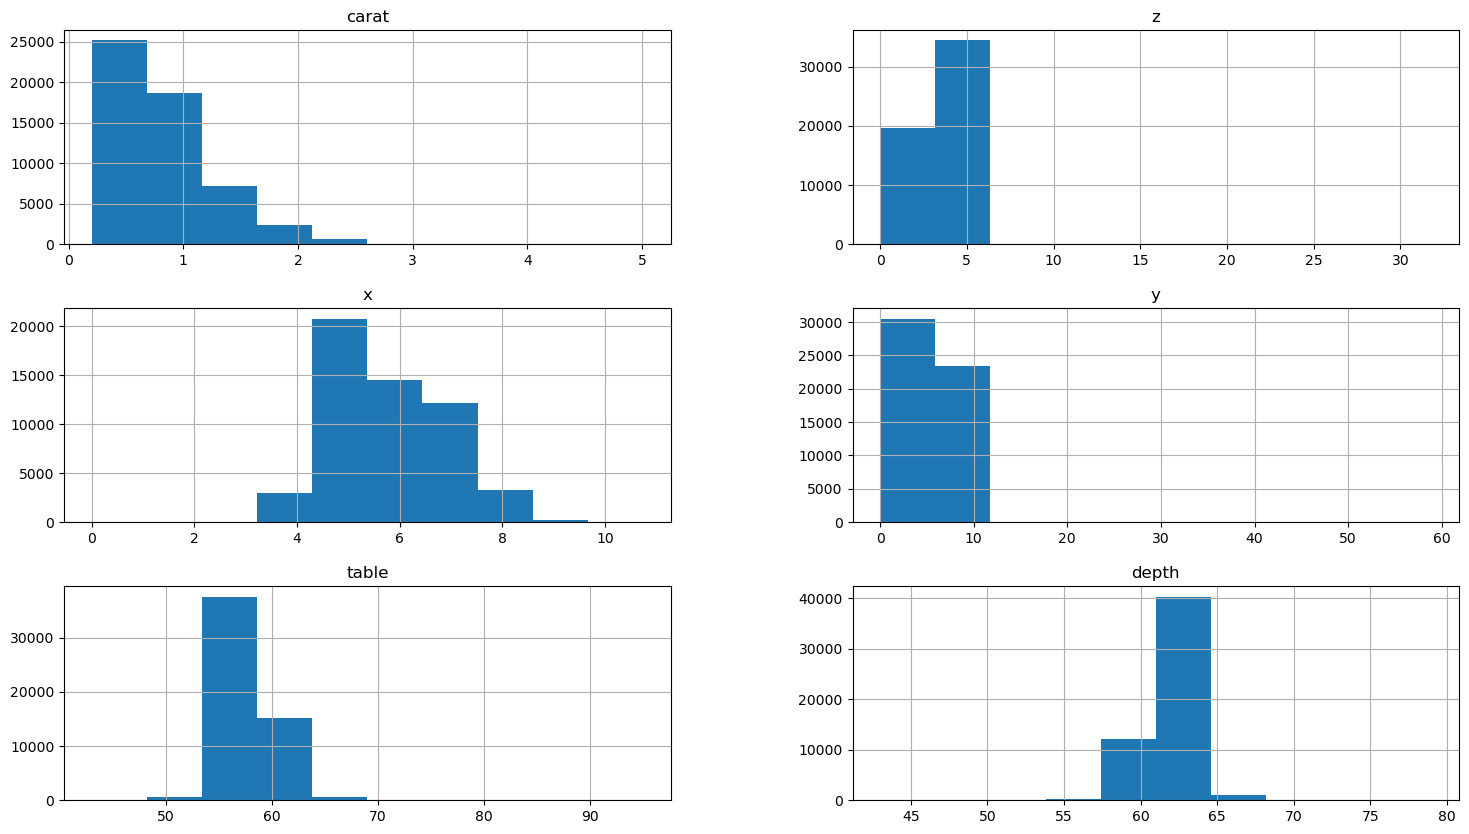

In [7]:
# Exploring Continuous variables using Scatter plot
contcols=["carat","z","x","y","table","depth"]
import matplotlib.pyplot as plt
import seaborn as sb

#fig,subplots=plt.subplots(nrows=1, ncols=len(contcols), figsize=(20,5))
#for i, col in enumerate(contcols):
 #   sb.displot(data=Diamond_data, x=col)
#fig.tight_layout()
#plt.show()
   # sb.histplot(data=Diamond_data, x= col, ax=subplots[i])
Diamond_data[contcols].hist(figsize=(18,10))    

## Interpreting the histograms

All the columns are selected. X,Y,Z have outliers which needs to be treated

# Outlier Treatment

In [8]:
Diamond_data["x"][Diamond_data["x"]>2].sort_values(ascending=True)

31596     3.73
31600     3.73
31598     3.74
31599     3.76
31601     3.77
         ...  
26444    10.01
25999    10.02
25998    10.14
27630    10.23
27415    10.74
Name: x, Length: 53932, dtype: float64

In [9]:
Diamond_data["x"][Diamond_data["x"]<3.73]=3.73

In [10]:
Diamond_data["y"][Diamond_data["y"]<20].sort_values(ascending=False)

27415    10.54
27630    10.16
25998    10.10
26444     9.94
25999     9.94
         ...  
15951     0.00
24520     0.00
49556     0.00
49557     0.00
27429     0.00
Name: y, Length: 53938, dtype: float64

In [11]:
Diamond_data["y"][Diamond_data["y"]>20]=10.54

In [12]:
Diamond_data["z"][Diamond_data["z"]<10].sort_values(ascending=False)

24067    8.06
27415    6.98
27630    6.72
27130    6.43
23644    6.38
         ... 
5471     0.00
24394    0.00
13601    0.00
2314     0.00
49557    0.00
Name: z, Length: 53939, dtype: float64

In [13]:
Diamond_data["z"][Diamond_data["z"]>8]=6.98

## Visualizing the distribution again after outlier treatment

array([[<Axes: title={'center': 'x'}>, <Axes: title={'center': 'y'}>],
       [<Axes: title={'center': 'z'}>, <Axes: >]], dtype=object)

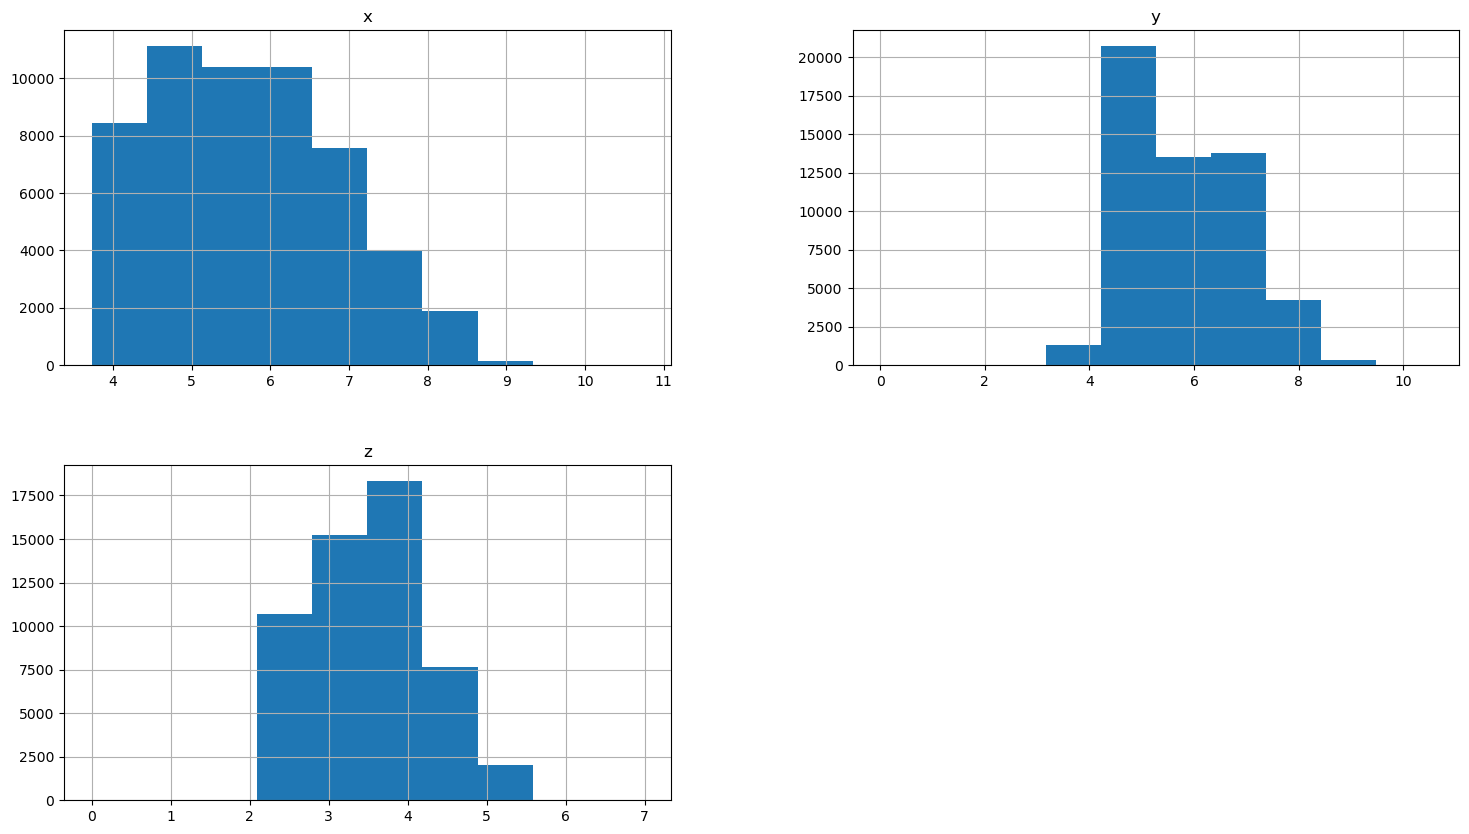

In [14]:
Diamond_data.hist(["x","y","z"], figsize=(18,10))

## Missing Vlaue Treatment

In [15]:
Diamond_data.isnull().sum()

price       0
carat       0
cut         0
color       6
clarity     0
depth      14
table       0
x           0
y           0
z           0
dtype: int64

In [16]:
# Replacing Missing values of Categotical variable with Mode and Continuous Varible with Median
#Replacing the missing value of color with its mode
Diamond_data["color"].fillna(value=Diamond_data["color"].mode()[0], inplace=True)
Diamond_data["depth"].fillna(value=Diamond_data["depth"].median(), inplace=True)

In [17]:
#Checking the missing values again after treatment
Diamond_data.isnull().sum()

price      0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
dtype: int64

# Exploration of Relationship with Variables
#### Visual Exploration
* Continuous Vs Continuous ---- Scatter Plot
* Categorical Vs Continuous---- Box Plot
* Categorical Vs Categorical---- Grouped Bar Plots

#### Statistical measurement of relationship strength between variables¶
* Continuous Vs Continuous ---- Correlation matrix
* Categorical Vs Continuous---- ANOVA test
* Categorical Vs Categorical--- Chi-Square test


## Relationship exploration: Continuous Vs Continuous -- Scatter Charts

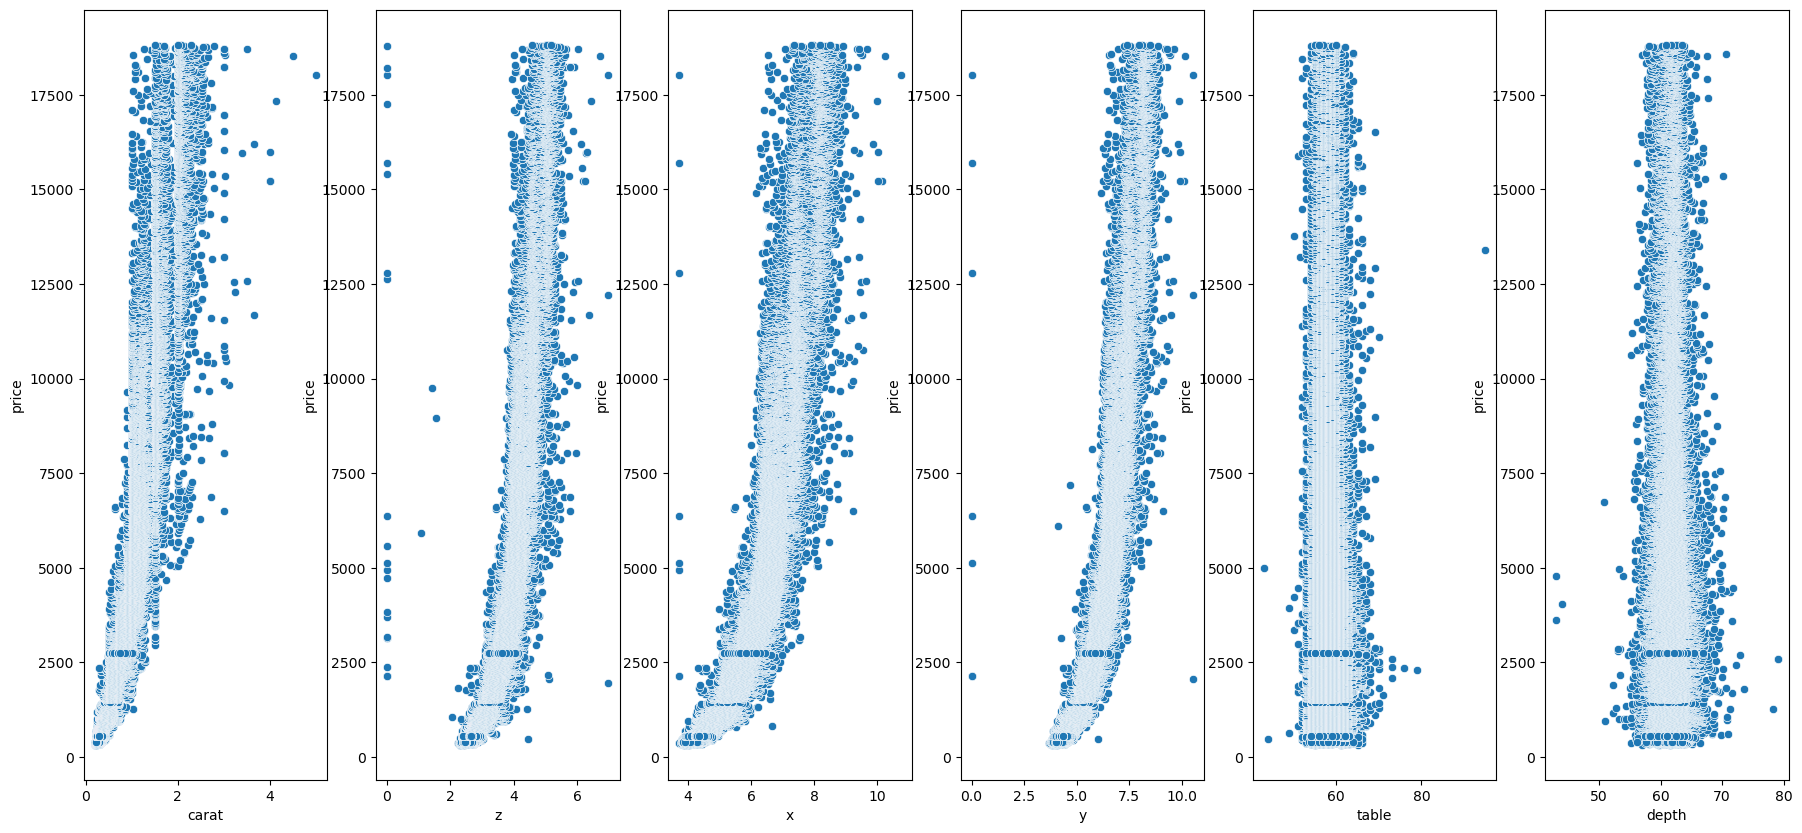

In [18]:
contcols=["carat","z","x","y","table","depth"]
fig,subplots=plt.subplots(nrows=1, ncols=len(contcols), figsize=(22,10))
for i,col in enumerate(contcols):
    sb.scatterplot(data=Diamond_data, x=col, y="price", ax=subplots[i])

In [19]:
filterdata=(Diamond_data["z"]>2.06) & (Diamond_data["z"]<6.5)
Diamond_data=Diamond_data[filterdata]

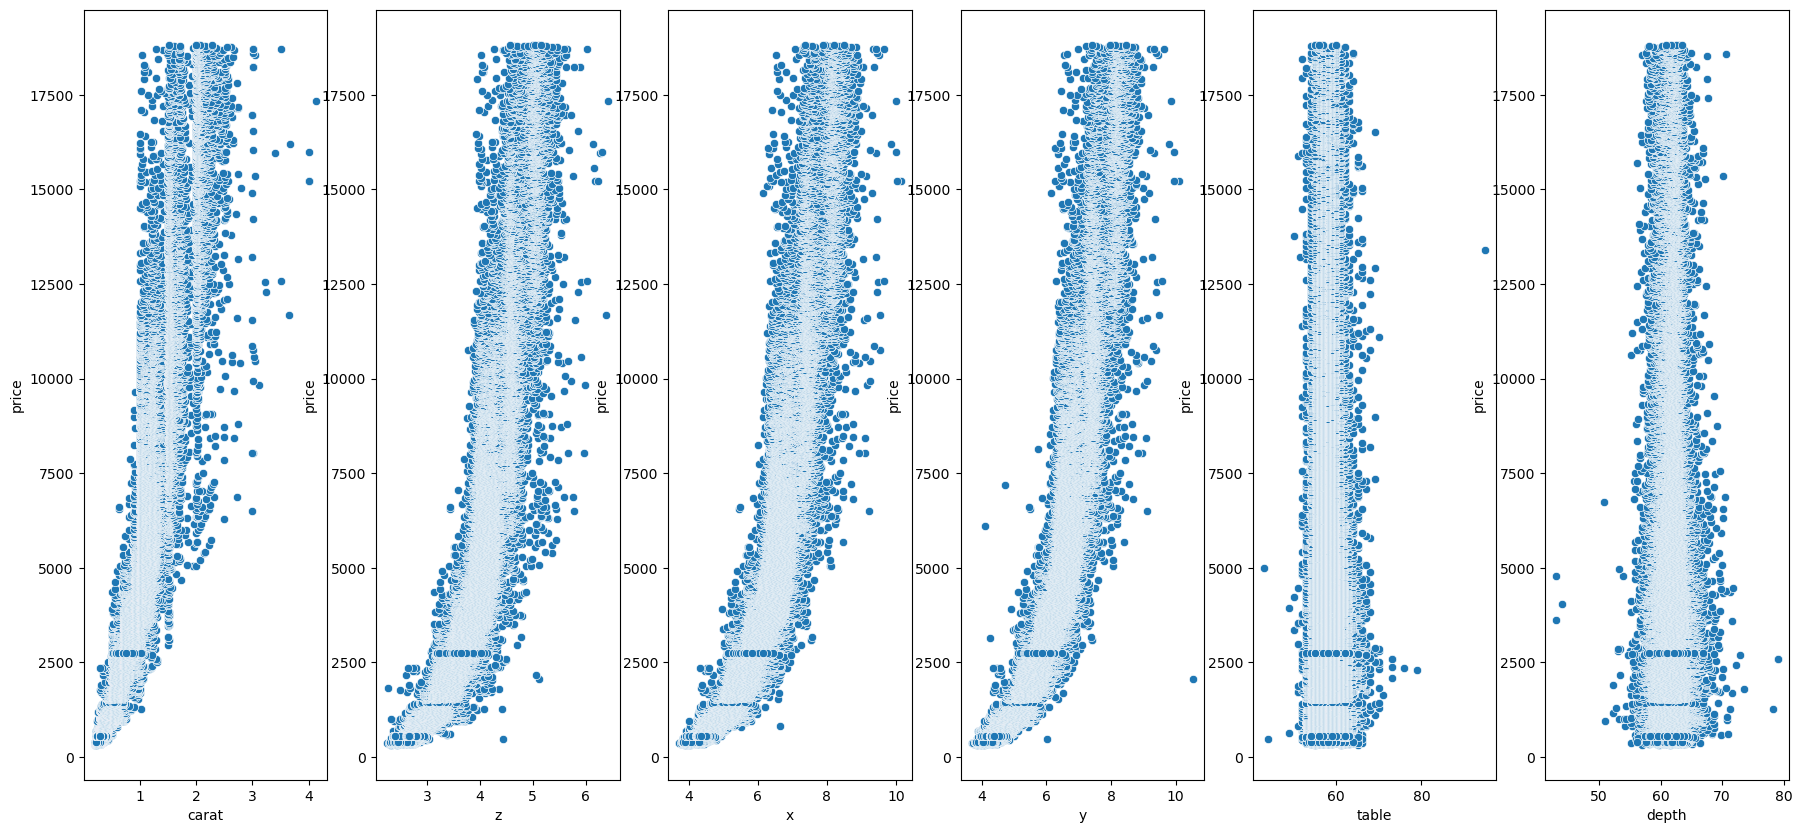

In [20]:
#Visualizing Again
contcols=["carat","z","x","y","table","depth"]
fig,subplots=plt.subplots(nrows=1, ncols=len(contcols), figsize=(22,10))
for i,col in enumerate(contcols):
    sb.scatterplot(data=Diamond_data, x=col, y="price", ax=subplots[i])

### Statistical Measurement

In [21]:
# For Continuous vs Continuous- Correlation Analysis
contcols=["price","carat","z","x","y","table","depth"]
CorrData=Diamond_data[contcols].corr()
CorrData

,price,carat,z,x,y,table,depth
price,1.000000,0.921887,0.882473,0.887157,0.888561,0.127275,-0.011008
carat,0.921887,1.000000,0.977127,0.978055,0.976929,0.181810,0.027587
z,0.882473,0.977127,1.000000,0.991559,0.991253,0.155726,0.096262
x,0.887157,0.978055,0.991559,1.000000,0.998439,0.196165,-0.025321
y,0.888561,0.976929,0.991253,0.998439,1.000000,0.189877,-0.028439
table,0.127275,0.181810,0.155726,0.196165,0.189877,1.000000,-0.295761
depth,-0.011008,0.027587,0.096262,-0.025321,-0.028439,-0.295761,1.000000


In [22]:
# Filtering only those columns where absolute correlation > 0.5 with Target Variable
# reduce the 0.5 threshold if no variable is selected like in this case
CorrData['price'][abs(CorrData['price']) > 0.5 ]

price    1.000000
carat    0.921887
z        0.882473
x        0.887157
y        0.888561
Name: price, dtype: float64

**Final Selected Columns**

carat, x,y,z

## Relationship exploration: Categorical Vs Continuous -- Box Plots

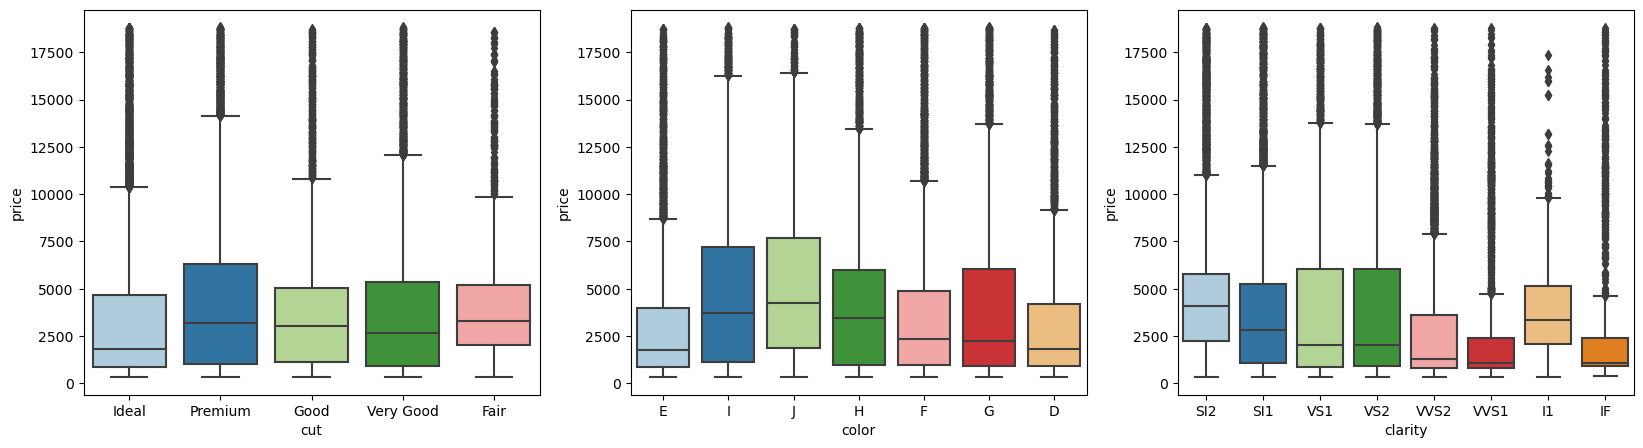

In [23]:
catcol=["cut","color","clarity"]

fig,subplots=plt.subplots(nrows=1, ncols=len(catcol), figsize=(20,5))

for i, col in enumerate(catcol):
    sb.boxplot(data=Diamond_data, x=col, y="price",palette="Paired", ax=subplots[i])
plt.show()

In [24]:
# For Continuous vs Categorical- ANOVA
# Assumption(H0): There is NO relation between the given variables (i.e. The average(mean) values of the numeric 
# Target variable is same for all the groups in the categorical Predictor variable)
# ANOVA Test result: Probability of H0 being true
def anova_result(cat_pred,target,data):
    from scipy.stats import f_oneway 
#Creating an empty list to append the select predictors    
    selected=[]
    
    for col in cat_pred:
        catlist=data.groupby(col)[target].apply(list)
        anovaresult=f_oneway(*catlist)
        
        #if p-value<0.5 then reject H0
        if(anovaresult[1]<0.5):
            print(col, "is corelated with ", target, '| P-Value:', anovaresult[1])
            selected.append(col)
        else:
            print(col, "is not corelated with ", target, '| P-Value:', anovaresult[1])
            

In [25]:
anova_result(cat_pred=["cut","color","clarity"], target="price",data=Diamond_data)    

cut is corelated with  price | P-Value: 1.1724065351734302e-148
color is corelated with  price | P-Value: 0.0
clarity is corelated with  price | P-Value: 3.09531994e-316


**Final Selected Columns**

cut, color, clarity

# Selecting final Predictors for Machine Learning


In [26]:
selectedcols=["cut","color","clarity","carat", "x","y","z" ]
Datafor_ML=Diamond_data[selectedcols]
Datafor_ML.head(10)

,cut,color,clarity,carat,x,y,z
0,Ideal,E,SI2,0.23,3.95,3.98,2.43
1,Premium,E,SI1,0.21,3.89,3.84,2.31
2,Good,E,VS1,0.23,4.05,4.07,2.31
3,Premium,I,VS2,0.29,4.20,4.23,2.63
4,Good,J,SI2,0.31,4.34,4.35,2.75
5,Very Good,J,VVS2,0.24,3.94,3.96,2.48
6,Very Good,I,VVS1,0.24,3.95,3.98,2.47
7,Very Good,H,SI1,0.26,4.07,4.11,2.53
8,Fair,E,VS2,0.22,3.87,3.78,2.49
9,Very Good,H,VS1,0.23,4.00,4.05,2.39


# Converting the ordinal variable to numeric using mapping

In [27]:
Datafor_ML["cut"].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [28]:
# Replacing the ordinal values
Datafor_ML["cut"].replace({"Good":1,
                          "Very Good":2,
                          "Fair":3,
                          "Ideal":4,
                          "Premium": 5}, inplace=True)

In [29]:
# Looking at unique values of ordinal column
Datafor_ML['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [30]:
# Replacing the ordinal values
Datafor_ML['color'].replace({'J':1, 
                          'I':2,
                          'H':3,
                          'G':4,
                          'F':5,
                          'E':6,
                          'D':7
                         }, inplace=True)

In [31]:
# Looking at unique values of ordinal column
Datafor_ML['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [32]:
# Replacing the ordinal values
Datafor_ML['clarity'].replace({'I1':1,
                          'SI1':2,
                          'SI2':3,
                          'VS1':4,
                          'VS2':5,
                          'VVS1':6,
                          'VVS2':7,
                          'IF':8
                         }, inplace=True)

## Converting the nominal variable to numeric using get_dummies()

In [33]:
# Treating all the nominal variables at once using dummy variables
DataforML=pd.get_dummies(Datafor_ML)

# Adding Target Variable to the data
DataforML['price']=Diamond_data['price']

# Printing sample rows
DataforML.head()

,cut,color,clarity,carat,x,y,z,price
0,4,6,3,0.23,3.95,3.98,2.43,326
1,5,6,2,0.21,3.89,3.84,2.31,326
2,1,6,4,0.23,4.05,4.07,2.31,327
3,5,2,5,0.29,4.20,4.23,2.63,334
4,1,1,3,0.31,4.34,4.35,2.75,335


# Machine Learning: Splitting the data into Training and Testing sample

In [34]:
# Printing all the columns for our reference
DataforML.columns

Index(['cut', 'color', 'clarity', 'carat', 'x', 'y', 'z', 'price'], dtype='object')

In [35]:
TargetVariable="price"
Predictors=['cut', 'color', 'clarity', 'carat', 'x', 'y', 'z']

X=DataforML[Predictors].values
Y=DataforML[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest=train_test_split(X, Y, test_size=0.3, random_state=564)

In [36]:
# Sanity check for the sampled data
print(Xtrain.shape)
print(Ytrain.shape)
print(Xtest.shape)
print(Ytest.shape)

(37738, 7)
(37738,)
(16174, 7)
(16174,)


# Multiple Linear Regression

In [40]:
from sklearn.linear_model import LinearRegression
Reg_Model=LinearRegression()
print(Reg_Model)

#Creating the model on Training data
ML=Reg_Model.fit(Xtrain, Ytrain)
Prediction=ML.predict(Xtest)

#Measuring Goodness of fit in training data
from sklearn import metrics
print("The R2 value is: ", metrics.r2_score(Ytrain, ML.predict(Xtrain)))

#Printing some sample values
TestResult=pd.DataFrame(columns=Predictors, data=Xtest)
TestResult[TargetVariable]=Ytest
TestResult["Predicted "+TargetVariable]=np.round(Prediction)
print(TestResult.head(10))

#Calculating the error
TestResult["APE"]=(100*(abs(TestResult[TargetVariable]-TestResult["Predicted "+TargetVariable])/
                   TestResult[TargetVariable]))

MAPE=TestResult["APE"].mean()
MedianAPE=TestResult["APE"].median()

# Calculating and printing Accuracy
print("The Accuracy on test data is: ", 100-MAPE)
print("The Median Accuracy on test data is: ", 100-MedianAPE)

# Defining a custom function to calculate accuracy
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(Reg_Model, X , Y, cv=5, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


LinearRegression()
The R2 value is:  0.8949428911435086
   cut  color  clarity  carat     x     y     z  price  Predicted price
0  5.0    6.0      5.0   0.31  4.39  4.36  2.65    872            951.0
1  5.0    2.0      2.0   1.91  8.11  8.07  4.93  13367          12252.0
2  2.0    3.0      4.0   0.31  4.31  4.34  2.72    544           -462.0
3  2.0    4.0      5.0   0.61  5.44  5.47  3.38   1861           2321.0
4  4.0    5.0      2.0   0.70  5.74  5.82  3.46   2264           2642.0
5  2.0    7.0      7.0   1.04  6.49  6.53  3.96  10130           7659.0
6  4.0    5.0      8.0   0.43  4.89  4.86  3.00   1580           2391.0
7  5.0    2.0      2.0   1.32  7.14  7.09  4.29   6653           6837.0
8  5.0    3.0      4.0   0.33  4.53  4.48  2.68    743           -191.0
9  3.0    2.0      2.0   1.09  6.97  6.90  3.90   4273           4714.0
The Accuracy on test data is:  59.800786276850644
The Median Accuracy on test data is:  77.56251301395581

Accuracy values for 10-fold Cross Validation:

# Decision Tree

DecisionTreeRegressor(criterion='friedman_mse', max_depth=3)
R2 Value: 0.8879722894780434

##### Model Validation and Accuracy Calculations ##########
   price  Predictedprice
0    872           790.0
1  13367         14849.0
2    544           790.0
3   1861          1692.0
4   2264          2687.0
Mean Accuracy on test data: 77.0824790988851
Median Accuracy on test data: 82.22107926728643

Accuracy values for 10-fold Cross Validation:
 [66.06772555 65.13348718 68.71165848 65.27647577 68.89880323 76.20517553
 81.59232975 44.401267   75.02512743 67.01140141]

Final Average Accuracy of the model: 67.83


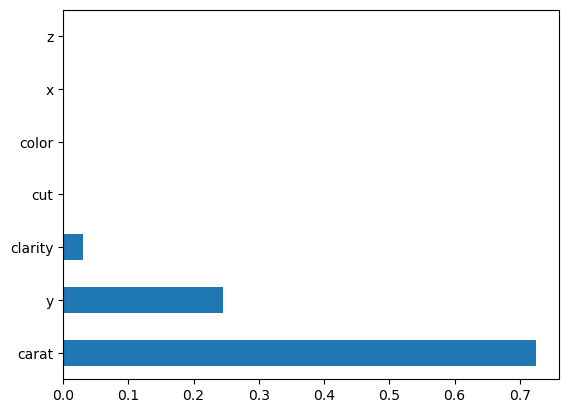

In [45]:
from sklearn.tree import DecisionTreeRegressor
RegModel=DecisionTreeRegressor(max_depth=3, criterion="friedman_mse")
print(RegModel)


DT=RegModel.fit(Xtrain,Ytrain)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(Ytrain, DT.predict(Xtrain)))

feature_importances = pd.Series(DT.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

print('\n##### Model Validation and Accuracy Calculations ##########')
prediction=DT.predict(Xtest)
# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=Xtest, columns=Predictors)
TestingDataResults[TargetVariable]=Ytest
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['price']-TestingDataResults['Predictedprice']))/TestingDataResults['price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , Y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))






digraph Tree {
node [shape=box, fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="carat <= 0.995\nfriedman_mse = 15626375.517\nsamples = 37738\nvalue = 3908.506"] ;
1 [label="carat <= 0.625\nfriedman_mse = 1236714.345\nsamples = 24438\nvalue = 1632.563"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="y <= 4.995\nfriedman_mse = 266395.738\nsamples = 17347\nvalue = 1053.312"] ;
1 -> 2 ;
3 [label="friedman_mse = 57743.343\nsamples = 12276\nvalue = 789.663"] ;
2 -> 3 ;
4 [label="friedman_mse = 195871.066\nsamples = 5071\nvalue = 1691.561"] ;
2 -> 4 ;
5 [label="y <= 6.015\nfriedman_mse = 781607.778\nsamples = 7091\nvalue = 3049.606"] ;
1 -> 5 ;
6 [label="friedman_mse = 387432.607\nsamples = 4937\nvalue = 2687.359"] ;
5 -> 6 ;
7 [label="friedman_mse = 694940.49\nsamples = 2154\nvalue = 3879.882"] ;
5 -> 7 ;
8 [label="y <= 7.195\nfriedman_mse = 15060318.441\nsamples = 13300\nvalue = 8090.424"] ;
0 -> 8 [labeldistance=2.5, labelangle=-45, headlabel="Fal

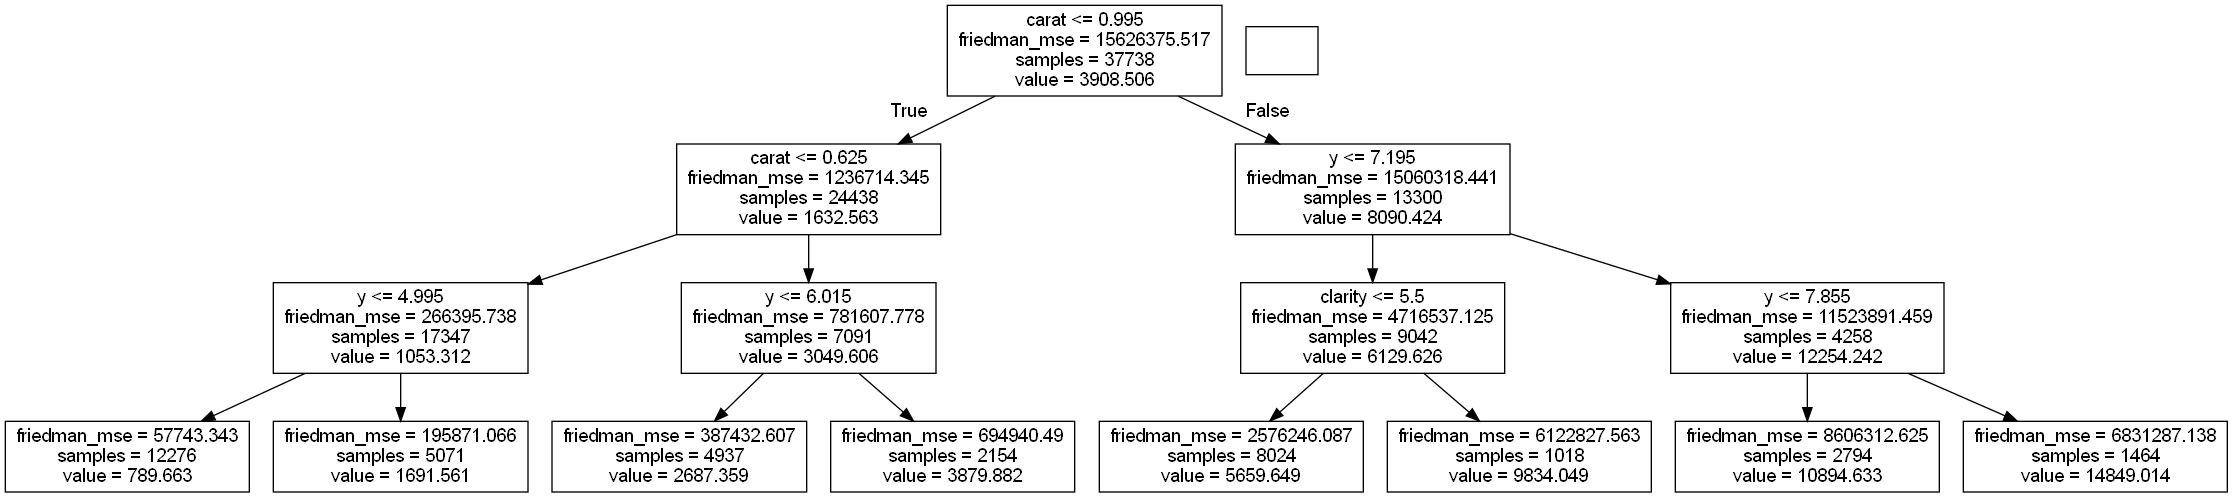

In [46]:
# Load libraries
from IPython.display import Image
from sklearn import tree
import pydotplus

# Create DOT data
dot_data = tree.export_graphviz(RegModel, out_file=None, 
                                feature_names=Predictors)
# printing the rules
print(dot_data)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png(), width=1200,height=900)
# Double click on the graph to zoom in